In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_dataset = np.loadtxt("hw3_train.txt")
test_dataset = np.loadtxt("hw3_test.txt")

x_train, y_train = train_dataset[:,:2], train_dataset[:,2]
x_test, y_test = test_dataset[:,:2], test_dataset[:,2]

In [3]:
print(x_train.shape, x_test.shape)

(100, 2) (1000, 2)


In [4]:
def visualization(x, y):
    for i in range(x.shape[0]):
        if y[i] == 1:
            plt.scatter(x[i,0], x[i,1], marker="o")
        else:
            plt.scatter(x[i,0], x[i,1], marker="x")

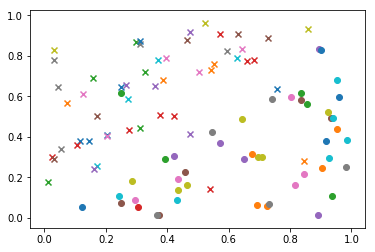

In [5]:
visualization(x_train, y_train)

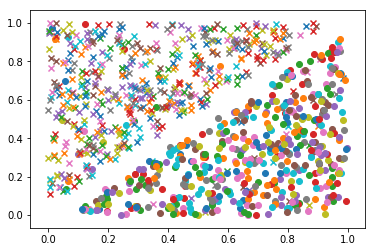

In [6]:
visualization(x_test, y_test)

In [7]:
def Gini_index(y):
    '''
    计算一个数据集的基尼指数.该数据集只有 +1, -1 两个类别
    '''
    p1 = np.sum(y==1)
    p2 = np.sum(y==-1)
    return 1 - p1** - p2**2

### 14. CART(Classification and Regression Tree)
Question : Draw the resulting tree (by program or by hand, in any way easily understandable by the TAs).

实现一个不剪枝的决策树，由于不进行剪枝，因此在训练集上可以实现全部正确。

In [8]:
from sklearn import tree

#### sklearn 中使用决策树
- The function to measure the quality of a split. 
    - “gini” for the Gini impurity.
    - “entropy” for the information gain.

#### CART sklearn实现时的设置
- scikit-learn uses an optimised version of the CART algorithm. 也就是本身就是 CART 算法.

In [9]:
clf = tree.DecisionTreeClassifier(criterion='gini')

In [10]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

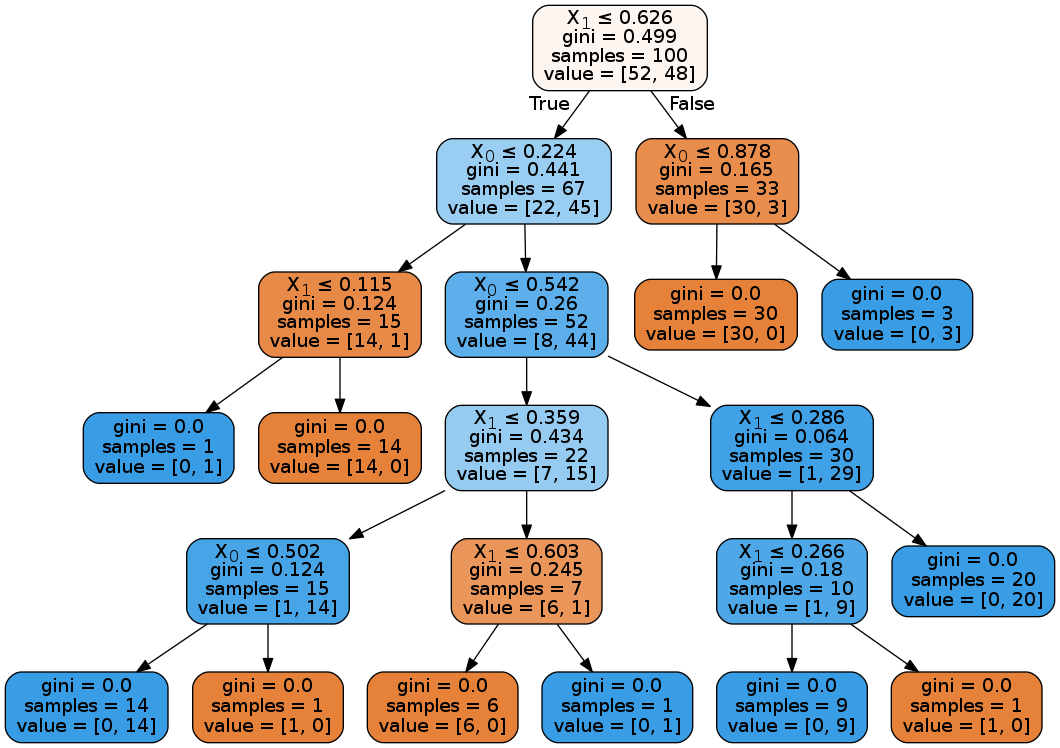

In [12]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

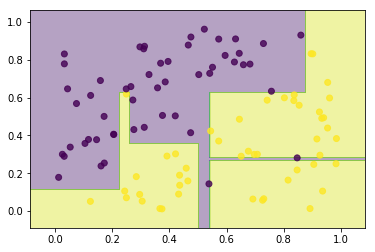

In [31]:
# 训练模型的可视化
x1_min, x1_max = x_train[:, 0].min() - 0.1, x_train[:, 0].max() + 0.1
x2_min, x2_max = x_train[:, 1].min() - 0.1, x_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.001),
                     np.arange(x2_min, x2_max, 0.001))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 训练集上明显出现了过拟合
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.8)
plt.show()

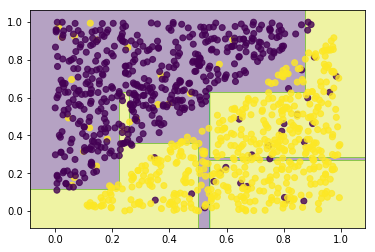

In [32]:
# 验证集上的表现
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, alpha=0.8)
plt.show()

### 15. E_in and E_out of the decision tree

In [29]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("E_in is ", 1- np.sum(y_pred_train == y_train)/len(y_train))
print("E_out is ", 1- np.sum(y_pred_test == y_test)/len(y_test))

E_in is  0.0
E_out is  0.126


#### 16. 剪枝练习
Question : Try pruning each leaf of the tree above. What is the lowest E_in that you can get from pruning one leaf? What is the corresponding E_out?

后剪枝在sklearn中做不到，只能手动将上述决策树过程写下来，然后完成剪枝。这个过程太麻烦了，放弃！